In [54]:
"""
File : display_data.ipynb
Created by : Amen Ouannes
Brief : Performing a display for important aspects of the dataset

"""

'\nFile : display_data.ipynb\nCreated by : Amen Ouannes\nBrief : Performing a display for important aspects of the dataset\n\n'

In [55]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle as pk
#data treatement functions
import data_O as tools
import importlib
importlib.reload(tools)

<module 'data_O' from '/data/amen/amen_env/data_processing/data_O.py'>

In [46]:
#extracting data
with open("full_dataset.pkl", 'rb') as f:    
    dataset = pk.load(f)
macs = {"D1:B6:FC:34:99:3A" : 7480, "F4:CC:E1:C5:8A:A9" :8855, "FB:E5:24:5B:8A:68" : 8851, "D0:C9:50:5E:88:F8" :8846, "D3:6B:03:69:94:4E" : 8854}

In [6]:
df = pd.DataFrame()
for value in dataset.values():
    df = pd.concat([df, value], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024005 entries, 0 to 3024004
Data columns (total 12 columns):
 #   Column      Dtype         
---  ------      -----         
 0   time        datetime64[ns]
 1   acc_x       float64       
 2   acc_y       float64       
 3   acc_z       float64       
 4   st_dev_x    float64       
 5   st_dev_y    float64       
 6   st_dev_z    float64       
 7   ax_dynamic  float64       
 8   ay_dynamic  float64       
 9   az_dynamic  float64       
 10  calfNumber  object        
 11  state       object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 276.9+ MB


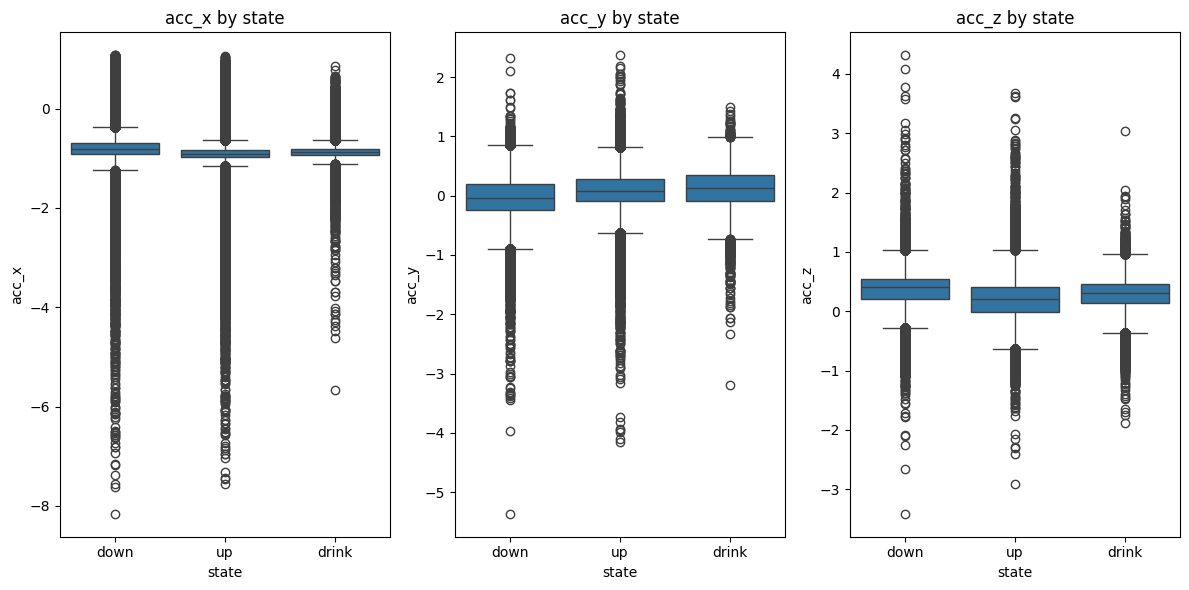

In [7]:
plt.figure(figsize=(12, 6))

# Plot for acc_x
plt.subplot(1, 3, 1)
sns.boxplot(x='state', y='acc_x', data=df)
plt.title('acc_x by state')


# Plot for acc_y
plt.subplot(1, 3, 2)
sns.boxplot(x='state', y='acc_y', data=df)
plt.title('acc_y by state')

# Plot for acc_z
plt.subplot(1, 3, 3)
sns.boxplot(x='state', y='acc_z', data=df)
plt.title('acc_z by state')

plt.tight_layout()
plt.show()

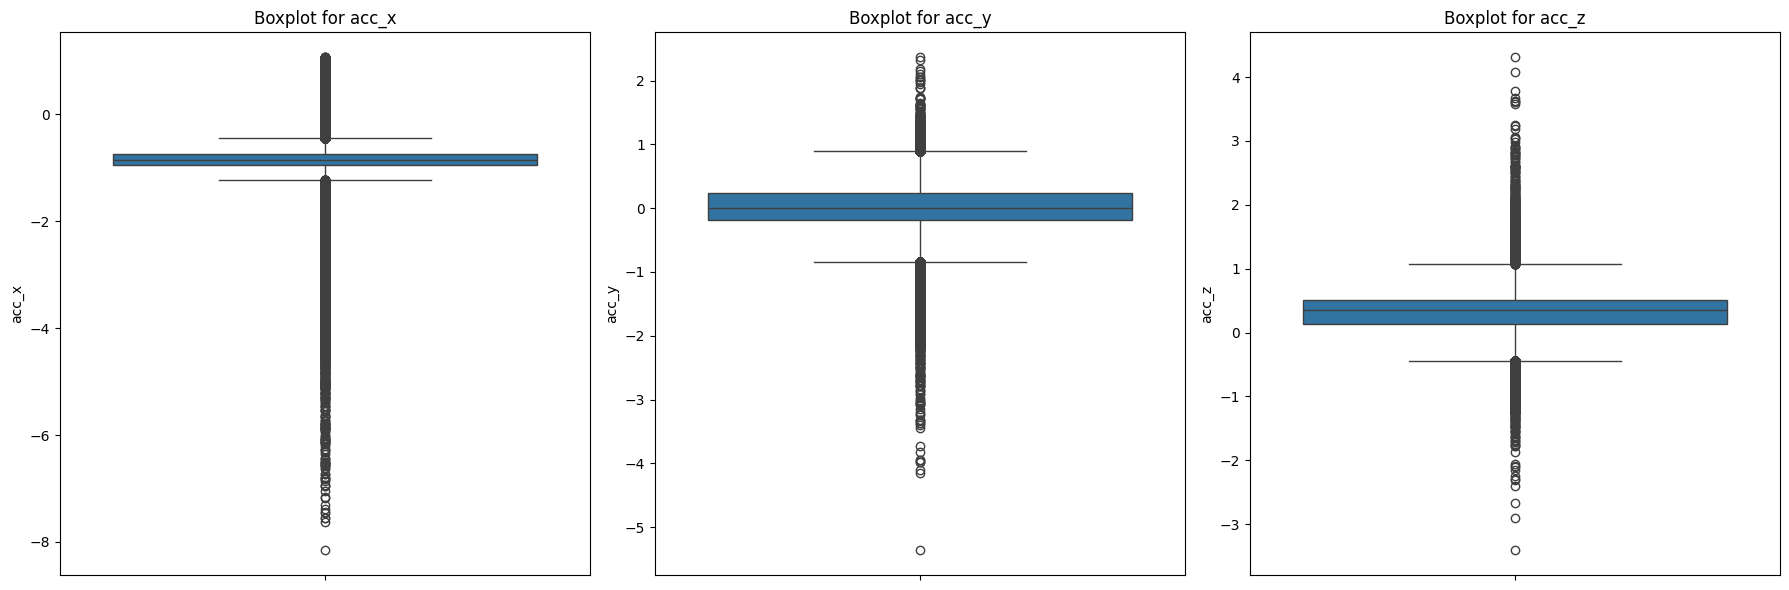

In [8]:
plt.figure(figsize=(18, 6))

# Plot for acc_x
plt.subplot(1, 3, 1)
sns.boxplot(y=df['acc_x'])
plt.title('Boxplot for acc_x')

# Plot for acc_y
plt.subplot(1, 3, 2)
sns.boxplot(y=df['acc_y'])
plt.title('Boxplot for acc_y')

# Plot for acc_z
plt.subplot(1, 3, 3)
sns.boxplot(y=df['acc_z'])
plt.title('Boxplot for acc_z')

plt.tight_layout()
plt.show()

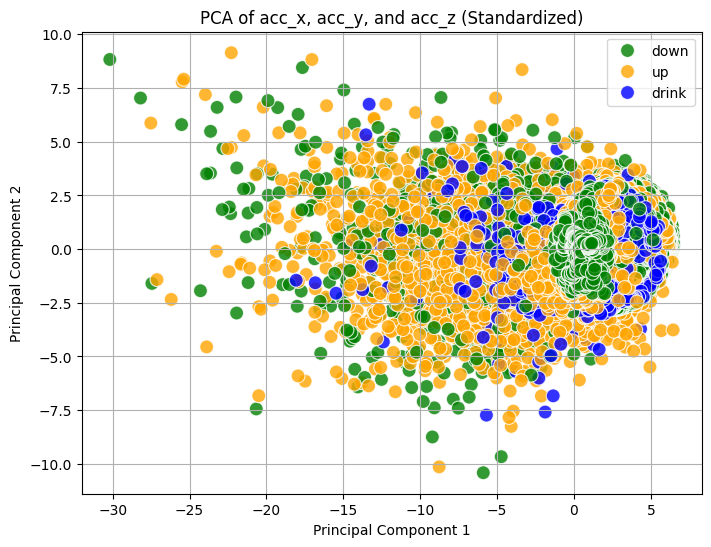

In [17]:
features = ['acc_x', 'acc_y', 'acc_z']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Add state information to the dataframe
principal_df['state'] = df['state']

# Define a custom color palette for the states
custom_palette = {
    'down': 'green',
    'up': 'orange',
    'drink': 'blue'
}

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 2', y='Principal Component 1', hue='state', data=principal_df, palette=custom_palette, s=100, alpha=0.8, edgecolor="w", marker='o')
plt.title('PCA of acc_x, acc_y, and acc_z (Standardized)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

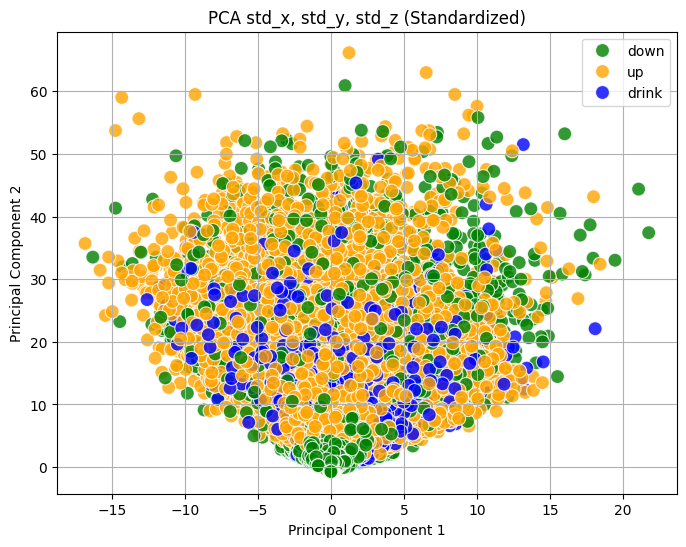

In [18]:
features = ['st_dev_x', 'st_dev_y', 'st_dev_z']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Add state information to the dataframe
principal_df['state'] = df['state']

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 2', y='Principal Component 1', hue='state', data=principal_df, palette=custom_palette, s=100, alpha=0.8, edgecolor="w", marker='o')
plt.title('PCA std_x, std_y, std_z (Standardized)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

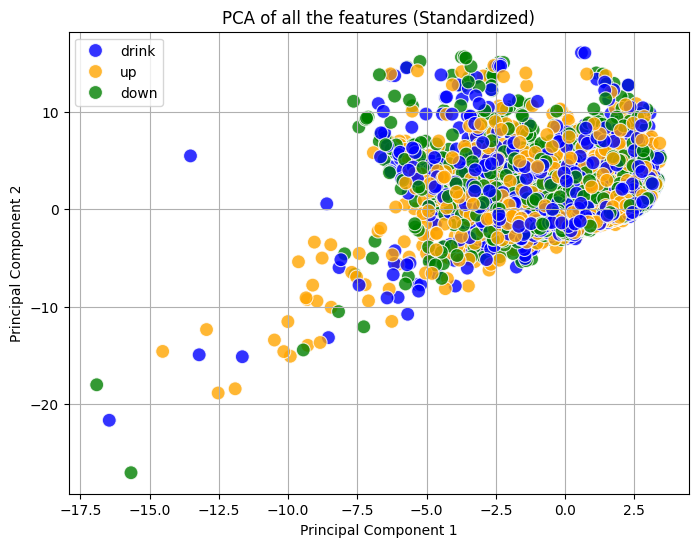

In [19]:
with open('train_data.pkl', 'rb') as f:
    data = pk.load(f)
features = ['acc_x', 'acc_y', 'acc_z', 'st_dev_x', 'st_dev_y', 'st_dev_z', 'Amag',
           'ax_dynamic', 'ay_dynamic', 'az_dynamic', 'static_acc_x',
           'static_acc_y', 'static_acc_z', 'OBDA', 'VeDBA', 'roll', 'pitch']
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Add state information to the dataframe
principal_df['state'] = data['state']

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 2', y='Principal Component 1', hue='state', data=principal_df, palette=custom_palette, s=100, alpha=0.8, edgecolor="w", marker='o')
plt.title('PCA of all the features (Standardized)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [39]:
drink_sequences = df[df['state'] == 'drink']

In [40]:
sample_sequence = tools.trunc(df[df['calfNumber'] == 8854], "2024-05-04 13:00:00.0", "2024-05-04 13:30:00.0")
sample_sequence['state'].value_counts()

state
down     910
up       756
drink    135
Name: count, dtype: int64

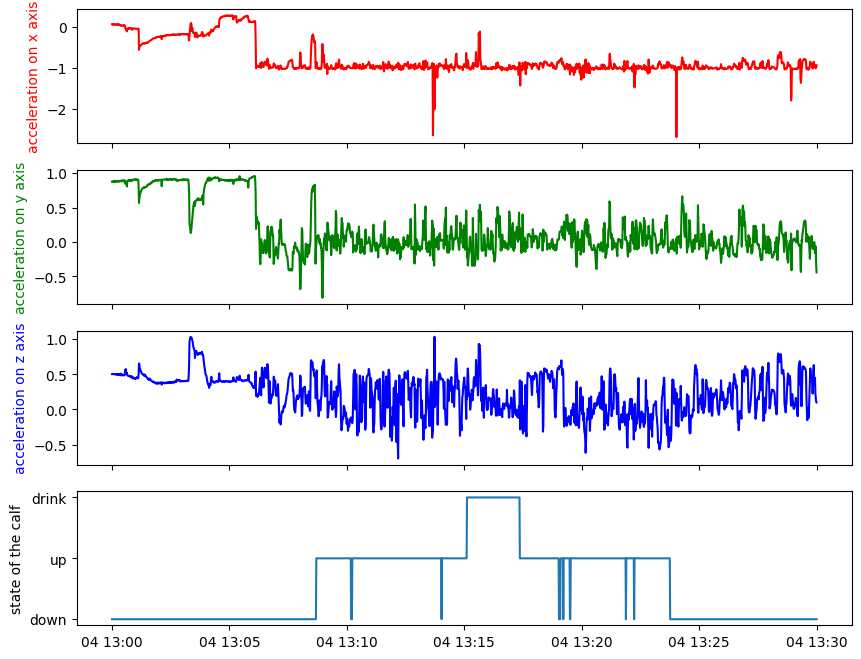

In [41]:
tools.display(sample_sequence)

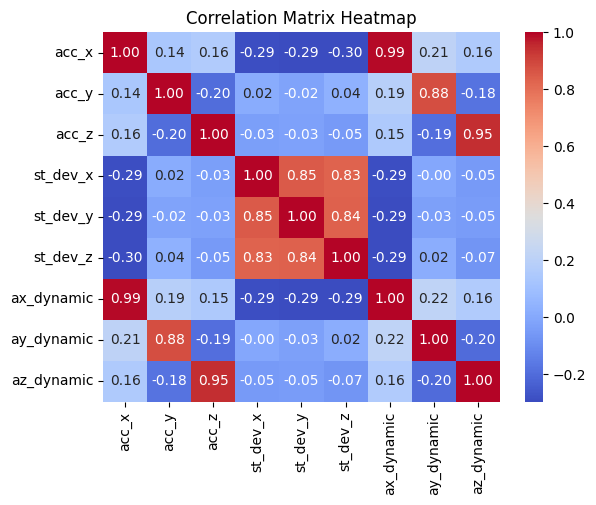

In [43]:
correlation_matrix = df[['acc_x', 'acc_y', 'acc_z', 'st_dev_x', 'st_dev_y', 'st_dev_z', 'ax_dynamic', 'ay_dynamic', 'az_dynamic']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

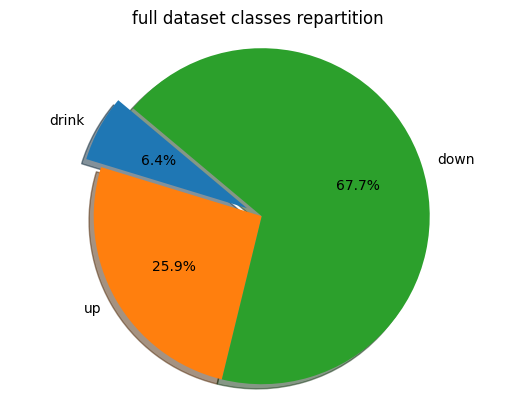

In [45]:
drink = (df[df['state'] == 'drink'])
up = (df[df['state'] == 'up'])
down = (df[df['state'] == 'down'])
size = len(df)
sizes = [(len(drink)/size)*100, (len(up)/size)*100, (len(down)/size)*100]
labels = ['drink', 'up', 'down']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('full dataset classes repartition')
plt.show()

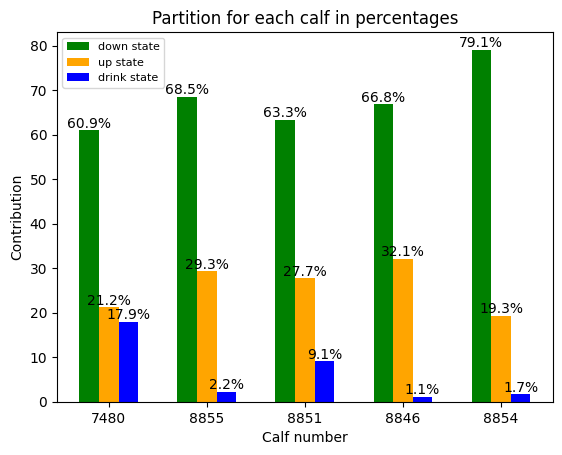

In [53]:
repartitions = []
x = [value for value in macs.values()]
for value in x:
    calf = df[df['calfNumber'] == value]
    down_value = down[down['calfNumber'] == value]
    up_value = up[up['calfNumber'] == value]
    drink_value = drink[drink['calfNumber'] == value]
    repartitions.append((down_value, up_value, drink_value,calf))
    

x_indices = np.arange(len(x))
bar_width = 0.2  # Width of the bars
y1 = [len(value[0])/len(value[3])*100 for value in repartitions]
y2 = [len(value[1])/len(value[3])*100 for value in repartitions]
y3 = [len(value[2])/len(value[3])*100 for value in repartitions]
# Create bar plots
bars1 = plt.bar(x_indices - bar_width, y1, width=bar_width, color='green', label='down state')
bars2 = plt.bar(x_indices, y2, width=bar_width, color='orange', label='up state')
bars3 = plt.bar(x_indices + bar_width, y3, width=bar_width, color='blue', label='drink state')

# Add value labels on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom')
for bar in bars3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom')

# Add labels and title
plt.xlabel('Calf number')
plt.ylabel('Contribution')
plt.title('Partition for each calf in percentages')
plt.xticks(x_indices, x)  # Set x-axis labels
plt.legend(fontsize=8)

# Show the plot
plt.show()